In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from mplsoccer import Pitch, add_image, FontManager
import requests
import json
from bs4 import BeautifulSoup
from PIL import Image 
from urllib.request import urlopen
from urllib.error import HTTPError
import ScraperFC as sfc

sofascore = sfc.Sofascore()

URL_MATCH = "https://www.sofascore.com/huachipato-cobreloa/jnbsonb#11986410"


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_27268\3322636586.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\USUARIO\.virtualenvs\resumenes_estadisticos-gP1gJ5q3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Generar el grafico de ejemplo

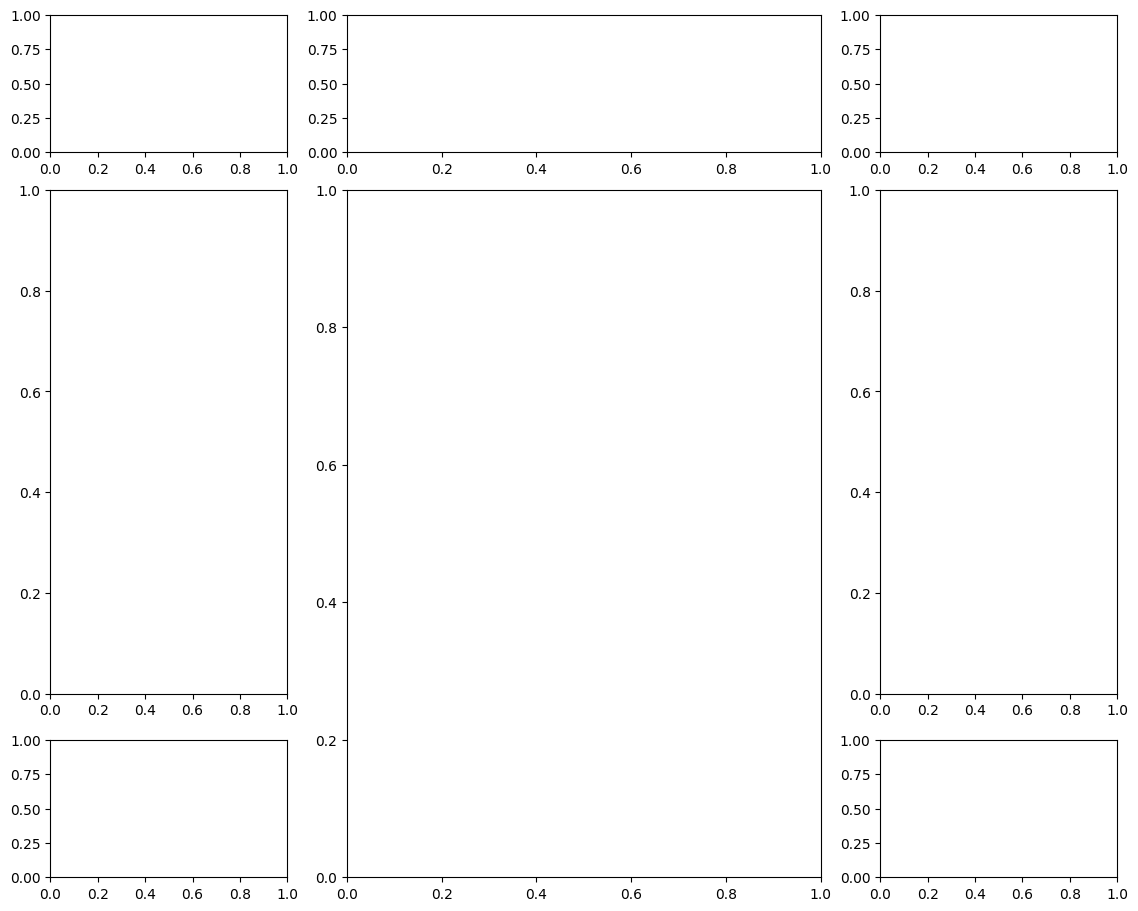

In [2]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=6)
fig.set_facecolor('white')

# escudo local
ax1 = fig.add_subplot(gs[0,0:1])

# escudo visitante
ax2 = fig.add_subplot(gs[0,3:4])

ax3 = fig.add_subplot(gs[0,1:3])

# equipo local
ax6 = fig.add_subplot(gs[1:4,:1])

ax10 = fig.add_subplot(gs[4:,:1])

ax7 = fig.add_subplot(gs[1:,1:3])

# equipo visitante
ax8 = fig.add_subplot(gs[1:4,3:4])

ax9 = fig.add_subplot(gs[4:,3:4])



### Agregar la fuente

In [3]:
fuente1 = FontManager("https://github.com/google/fonts/blob/main/ofl/abeezee/ABeeZee-Regular.ttf?raw=true")

In [13]:
partido_sofascore = sofascore.get_match_data(URL_MATCH)
nombre_local, nombre_visit = sofascore.get_team_names(URL_MATCH)
estadisticas_partido = sofascore.get_general_match_stats(URL_MATCH)

df_local, df_visit = sofascore.get_players_match_stats(URL_MATCH)

df_local.columns


Index(['name', 'slug', 'shortName', 'position', 'jerseyNumber', 'userCount',
       'id', 'country', 'marketValueCurrency', 'dateOfBirthTimestamp',
       'firstName', 'lastName', 'shirtNumber', 'jerseyNumber', 'position',
       'substitute', 'totalPass', 'accuratePass', 'totalLongBalls',
       'accurateLongBalls', 'savedShotsFromInsideTheBox', 'saves',
       'totalKeeperSweeper', 'accurateKeeperSweeper', 'minutesPlayed',
       'touches', 'rating', 'possessionLostCtrl', 'ratingVersions',
       'totalCross', 'accurateCross', 'aerialLost', 'aerialWon', 'duelLost',
       'duelWon', 'challengeLost', 'dispossessed', 'totalContest',
       'shotOffTarget', 'totalClearance', 'interceptionWon', 'totalTackle',
       'keyPass', 'outfielderBlock', 'fouls', 'wonContest', 'bigChanceCreated',
       'wasFouled', 'onTargetScoringAttempt', 'goals', 'bigChanceMissed',
       'blockedScoringAttempt', 'totalOffside', 'captain', 'team'],
      dtype='object')

### Obtener los jugadores destacados en esas metricas

In [5]:
lista_mayores = ['duelWon', 'touches', 'keyPass', 'accuratePass'] # hay ligas que no tienen xG ni xA
nombre_mayores_local = []
valor_mayores_local = []
nombre_mayores_visit = []
valor_mayores_visit = []

# equipo local
for i in range(len(lista_mayores)):
    nombre = df_local.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][0]
    valor = df_local.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][1]
    nombre_mayores_local.append(nombre)
    valor_mayores_local.append(valor)
    
# equipo visitante
for i in range(len(lista_mayores)):
    nombre = df_visit.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][0]
    valor = df_visit.sort_values(by=lista_mayores[i], ascending=False)[['name', lista_mayores[i]]].values[0][1]
    nombre_mayores_visit.append(nombre)
    valor_mayores_visit.append(valor)
    
nombre_mayores_local, valor_mayores_local

(['Marco Borgnino', 'Marco Campagnaro', 'Marco Campagnaro', 'Bastian Tapia'],
 [9.0, 62.0, 2.0, 39.0])

### Obtener imagen del jugador destacado de cada equipo

In [6]:
jugador_destacado_local = df_local[['name', 'rating']].sort_values(by='rating', ascending=False).iloc[0]['name']
jugador_destacado_visit = df_visit[['name', 'rating']].sort_values(by='rating', ascending=False).iloc[0]['name']
id_jug_local = df_local[df_local['name'] == jugador_destacado_local].id.values[0]
id_jug_visit = df_visit[df_visit['name'] == jugador_destacado_visit].id.values[0]

try:
  imagen_jug_local = Image.open(urlopen(f'https://api.sofascore.app/api/v1/player/{id_jug_local}/image'))
except HTTPError as e:
  print(f'An exception occurred {e}')
  imagen_jug_local = ''

try:
  imagen_jug_visit = Image.open(urlopen(f'https://api.sofascore.app/api/v1/player/{id_jug_visit}/image'))
except HTTPError as e:
  print(f'An exception occurred {e}')
  imagen_jug_visit = ''



### Sacar inforamcion de cada jugador

In [7]:
df_jug_local = df_local[df_local['name'] == jugador_destacado_local]
df_jug_visit = df_visit[df_visit['name'] == jugador_destacado_visit]

df_jug_local.columns

Index(['name', 'slug', 'shortName', 'position', 'jerseyNumber', 'userCount',
       'id', 'country', 'marketValueCurrency', 'dateOfBirthTimestamp',
       'firstName', 'lastName', 'shirtNumber', 'jerseyNumber', 'position',
       'substitute', 'totalPass', 'accuratePass', 'totalLongBalls',
       'accurateLongBalls', 'savedShotsFromInsideTheBox', 'saves',
       'totalKeeperSweeper', 'accurateKeeperSweeper', 'minutesPlayed',
       'touches', 'rating', 'possessionLostCtrl', 'ratingVersions',
       'totalCross', 'accurateCross', 'aerialLost', 'aerialWon', 'duelLost',
       'duelWon', 'challengeLost', 'dispossessed', 'totalContest',
       'shotOffTarget', 'totalClearance', 'interceptionWon', 'totalTackle',
       'keyPass', 'outfielderBlock', 'fouls', 'wonContest', 'bigChanceCreated',
       'wasFouled', 'onTargetScoringAttempt', 'goals', 'bigChanceMissed',
       'blockedScoringAttempt', 'totalOffside', 'captain', 'team'],
      dtype='object')

### obtener informacion de los equipos

In [8]:
# id equipos
idlocal = partido_sofascore['homeTeam']['id']
idvisit = partido_sofascore['awayTeam']['id']

# escudos de los equipos
imagen1 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idlocal}/image'))
imagen2 = Image.open(urlopen(f'https://api.sofascore.app/api/v1/team/{idvisit}/image'))

# goles de los equipos
goleslocal = partido_sofascore['homeScore']['normaltime']
golesvisit = partido_sofascore['awayScore']['normaltime']


### Sacar info de la jornada

In [9]:
torneo = partido_sofascore['season']['name']
fecha = partido_sofascore['roundInfo']['round']

f'{nombre_local} - {nombre_visit}'

'Cobreloa - Huachipato'

### Quitar las lineas de los plots

In [10]:
def sacar_spines(ax):
    ax.spines[['top', 'right', 'bottom', 'left']]
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

### Obtener estadísticas de cada equipo por separado

In [11]:
listas_estadisticas_partido = estadisticas_partido['name'].to_list()
lista_valores_partido_local = []
lista_valores_partido_visit = []

# equipo local
for i in range(len(listas_estadisticas_partido)):
    valor = estadisticas_partido[estadisticas_partido['name'] == listas_estadisticas_partido[i]]['home'].values[0]
    lista_valores_partido_local.append(valor)
    
# equipo visitante
for i in range(len(listas_estadisticas_partido)):
    valor = estadisticas_partido[estadisticas_partido['name'] == listas_estadisticas_partido[i]]['away'].values[0]
    lista_valores_partido_visit.append(valor)



### Agregar la informacion al plot

Text(0, 0.8, '15/24 Pases Comp.')

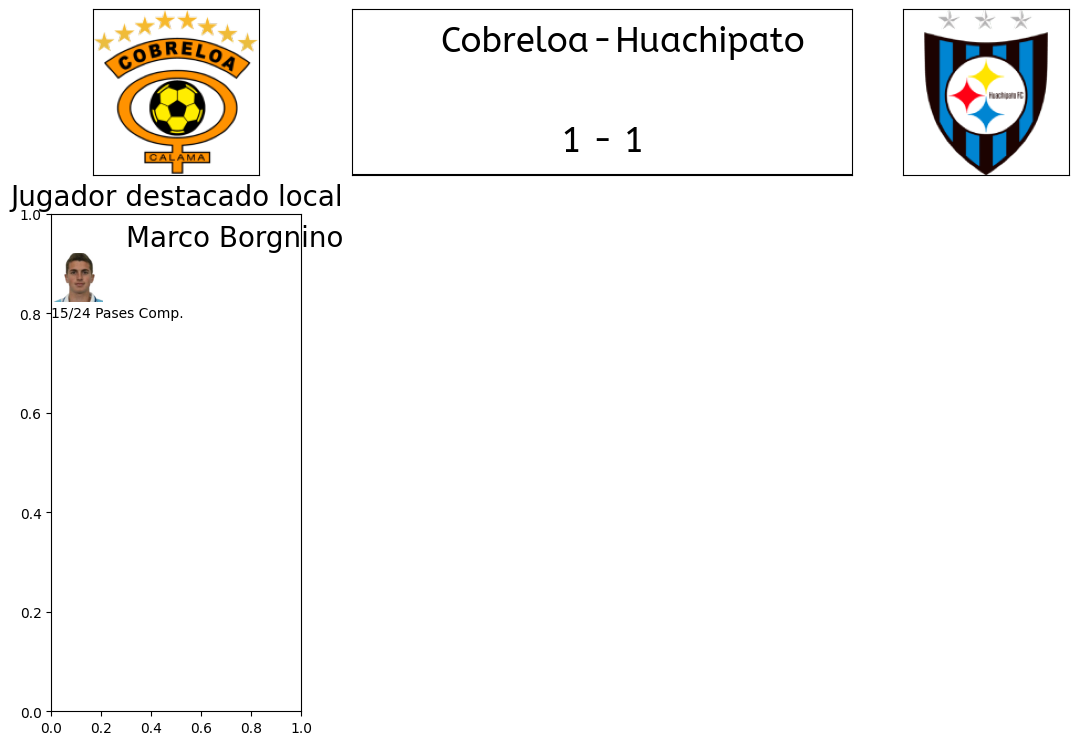

In [23]:
fig = plt.figure(figsize=(16,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=6)
fig.set_facecolor('white')

# Escudo local
ax1 = fig.add_subplot(gs[0,0:1])
ax1.imshow(imagen1)
sacar_spines(ax1)

# Escudo visitante
ax2 = fig.add_subplot(gs[0,3:4])
ax2.imshow(imagen2)
sacar_spines(ax2)

# info del partido
ax3 = fig.add_subplot(gs[0, 1:3])
ax3.text(.475, .8, f'{nombre_local}', ha='right', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.525, .8, f'{nombre_visit}', ha='left', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.5, .8, f'-', ha='center', va='center', fontproperties=fuente1.prop, size=25)
ax3.text(.5, .2, f'{goleslocal} - {golesvisit}', ha='center', va='center', fontproperties=fuente1.prop, size=25)
ax3.axhline(0, color='black')
sacar_spines(ax3)

lista_estadisticas = ['totalPass', 'accuratePass', 'duelWon', 'duelLost', 'keyPass', 'touches', 'goals', 'totalTackle', 'interceptionWon'] # ...
valores_jug_local = df_jug_local[lista_estadisticas].values
ax6 = fig.add_subplot(gs[1:4, :1])
ax6.set_title('Jugador destacado local', size=20)
if imagen_jug_local:
    ax_image2 = add_image(imagen_jug_local, fig, left=0.0113, bottom=0.67, width=0.055, height=0.055)
else:
    print('F')
ax6.text(.3,.95, f'{jugador_destacado_local}', ha='left', va='center', size=20)
ax6.text(0,.8, f'{int(valores_jug_local[0][1])}/{int(valores_jug_local[0][0])} Pases Comp.', ha='left', va='center', size=20)
